### Лабораторная работа №3
Студент: Прудникова Анастасия Алексеевна

In [112]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

1. Выбор наборов данных и обоснование

Из предоставленных данных мы имеем физико-химические показатели вин и сенсорные оценки качества. В задаче классификации, мы можем использовать переменную "quality" в качестве целевой переменной, чтобы предсказать качество вина. В задаче регрессии, мы можем использовать все остальные переменные,чтобы предсказать количество алкоголя в вине.

2. Выбор метрик качества и обоснование

Для задачи классификации, мы можем использовать метрику accuracy_score для оценки точности модели в предсказании качества вина. Для задачи регрессии, можно использовать метрику среднеквадратичной ошибки (mean_squared_error) для оценки точности модели в предсказании количества алкоголя в вине.

In [68]:
# 3. Создание бейзлайна

# Загрузить данные из файла
data = pd.read_csv('metadata.csv')
data = data.dropna()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
# Разделение данных на признаки и целевую переменную
X = data.drop('quality', axis=1)
y = data['quality']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Оценка качества константным предиктором
dummy_pred = np.full_like(y_test, np.mean(y_train))
mse_dummy = mean_squared_error(y_test, dummy_pred)
mae_dummy = mean_absolute_error(y_test, dummy_pred)
accuracy_dummy = accuracy_score(y_test, dummy_pred)

print("Mean Squared Error (Dummy):", mse_dummy)
print("Mean Absolute Error (Dummy):", mae_dummy)
print("Accuracy (Dummy):", accuracy_dummy)

Mean Squared Error (Dummy): 1.121875
Mean Absolute Error (Dummy): 0.759375
Accuracy (Dummy): 0.40625


In [82]:
# b. Обучить модели линейной и логистической регрессии из sklearn

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_train_pred = linear_reg.predict(X_train)

print('MSE тренировочных данных линейной регрессии:', mean_squared_error(y_train, y_train_pred))

MSE тренировочных данных линейной регрессии: 0.42419115731399015


In [83]:
# Создание и обучение модели логистической регрессии
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

y_train_pred0 = logistic_reg.predict(X_train)
print('MSE тренировочных данных логистической регрессии:', mean_squared_error(y_train, y_train_pred0))

MSE тренировочных данных логистической регрессии: 0.5418295543393276


C:\Users\nprud\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


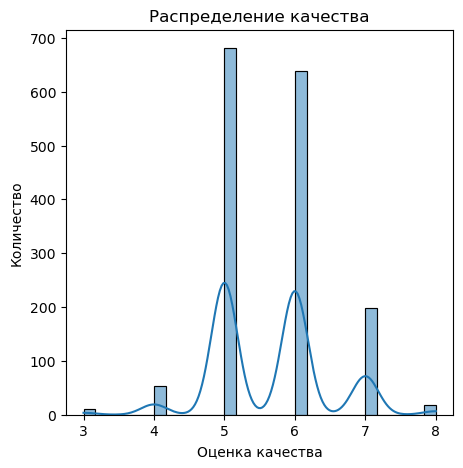

In [91]:
plt.figure(figsize=(5, 5))
sns.histplot(data["quality"], kde=True)
plt.xlabel("Оценка качества")
plt.ylabel("Количество")
plt.title("Распределение качества")
plt.show()

In [93]:

keras_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

keras_model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

keras_history = keras_model.fit(X_train, y_train, epochs=100)




Epoch 1/100


40/40 [==============================] - 1s 1ms/step - loss: 7.9719 - accuracy: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.8019 - accuracy: 0.0000e+00
Epoch 3/100
40/40 [==============================] - 0s 926us/step - loss: 0.6315 - accuracy: 0.0000e+00
Epoch 4/100
40/40 [==============================] - 0s 929us/step - loss: 0.6065 - accuracy: 0.0000e+00
Epoch 5/100
40/40 [==============================] - 0s 897us/step - loss: 0.5662 - accuracy: 0.0000e+00
Epoch 6/100
40/40 [==============================] - 0s 928us/step - loss: 0.5438 - accuracy: 0.0000e+00
Epoch 7/100
40/40 [==============================] - 0s 937us/step - loss: 0.5345 - accuracy: 0.0000e+00
Epoch 8/100
40/40 [==============================] - 0s 960us/step - loss: 0.5259 - accuracy: 0.0000e+00
Epoch 9/100
40/40 [==============================] - 0s 947us/step - loss: 0.5250 - accuracy: 0.0000e+00
Epoch 10/100
40/40 [==============================] - 

40/40 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.0000e+00
Epoch 69/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.0000e+00
Epoch 70/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.0000e+00
Epoch 71/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.0000e+00
Epoch 72/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.0000e+00
Epoch 73/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.0000e+00
Epoch 74/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.0000e+00
Epoch 75/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.0000e+00
Epoch 76/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.0000e+00
Epoch 77/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4

In [114]:
y_train_pred = keras_model.predict(X_train)
print('MSE:', mean_squared_error(y_train, y_train_pred))

40/40 [==============================] - 0s 801us/step
MSE: 0.667940147005675


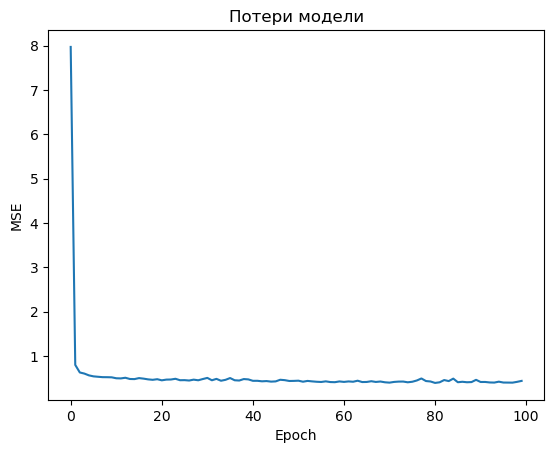

In [135]:
plt.plot(keras_history.history['loss'])
plt.title('Потери модели')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

### Вывод

Был реализован алгоритм регрессии и проведено сравнение точности с результатами моделей из пункта 4. Можно заметить, что точность моделей близка к точности моделей из sklearn, что говорит о корректности реализации алгоритмов.

### Лабораторная работа №4

In [124]:
# Алгоритм дерева решений
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return np.mean(y)

        feature_index, threshold = self._find_best_split(X, y)

        if feature_index is None:
            return np.mean(y)

        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return (feature_index, threshold, left_subtree, right_subtree)

    def _find_best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        y_var = np.var(y)
        best_feature_index, best_threshold = None, None
        best_score = float('inf')

        for feature_index in range(n):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                left_score = np.var(y[left_mask])
                right_score = np.var(y[right_mask])

                weighted_score = (np.sum(left_mask) * left_score + np.sum(right_mask) * right_score) / m

                if weighted_score < best_score:
                    best_score = weighted_score
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def predict_instance(self, x, tree):
        if isinstance(tree, (float, np.float64)):
            return tree
        feature_index, threshold, left_subtree, right_subtree = tree
        if x[feature_index] <= threshold:
            return self.predict_instance(x, left_subtree)
        else:
            return self.predict_instance(x, right_subtree)

    def predict(self, X):
        return np.array([self.predict_instance(x, self.tree) for x in X])


In [125]:
# Алгоритм случайного леса
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, max_features='auto', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), size=len(X), replace=True)
            X_subset, y_subset = X[indices], y[indices]
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_subset, y_subset)
            self.estimators.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.estimators])
        return np.mean(predictions, axis=0)
    
     

In [126]:
# Алгоритм градиентного бустинга
class GradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []
        self.weights = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        predictions = np.zeros_like(y, dtype=np.float64)

        for _ in range(self.n_estimators):
            residuals = y - predictions
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            tree_predictions = tree.predict(X)
            predictions += self.learning_rate * tree_predictions
            self.estimators.append(tree)
            self.weights.append(self.learning_rate)

    def predict(self, X):
        predictions = np.sum([self.learning_rate * tree.predict(X) for tree in self.estimators], axis=0)
        return predictions

     

In [128]:
# Создание и обучение моделей дерева решений, случайного леса и градиентного бустинга
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + 0.1 * np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2904)

In [130]:
tree_regressor = DecisionTree(max_depth=5)
tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, y_pred)

In [131]:
random_forest_regressor = RandomForest(n_estimators=100, max_depth=5, random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred = random_forest_regressor.predict(X_test)
random_forest_mse = mean_squared_error(y_test, y_pred)

In [132]:
gradient_boosting_regressor = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_regressor.fit(X_train, y_train)
y_pred = gradient_boosting_regressor.predict(X_test)
gradient_boosting_mse = mean_squared_error(y_test, y_pred)

In [134]:
print('Дерево решений:', decision_tree_mse)
print('Случайный лес:', random_forest_mse)
print('Градиентный бустинг:', gradient_boosting_mse)

Дерево решений: 0.012674190592588166
Случайный лес: 0.010240056232649402
Градиентный бустинг: 0.011360456410326491


### Вывод

   Как видно из MSE реализованных алгоритмов, каждый из них работает примерно одинаково эффективно при решении поставленной задачи.